# 分析泰坦尼克号数据

## 提出问题

`titanic-data.csv`中包含了泰坦尼克号上2224名乘客和船员中891名的人口学数据和乘客基本信息，包括：

* 是否幸存
* 舱位等级
* 性别
* 年龄
* 同船的亲属或配偶数量
* 同船的父母或子女数量
* 票号
* 票价
* 舱号
* 上船地点

我们想要通过这些数据研究的是：

`各种因素是否会对船上的人员幸存率产生影响？这种影响是提高幸存率还是降低幸存率？`

### 猜想

我们可以先根据常识对一些可能会对幸存率产生影响的因素进行猜想：

* 是否幸存
* **舱位等级**
* **性别**
* **年龄**
* **同船的亲属或配偶数量**
* **同船的父母或子女数量**
* 票号
* 票价
* 舱号
* 上船地点

### 导入原始数据

我们首先用python导入原始数据：

In [1]:
import math
import pandas as pd

# read data from csv file
titanic_data = pd.read_csv('titanic-data.csv')

def calculate_survival_ratio(survived):
    """This function calcuate the survival ratio through a survived panda.Series
    """
    return survived.mean()

### 年龄对幸存率的影响：

我们首先来研究年龄对幸存率的影响，我们将年龄划分为几个区间：

* 0至10岁
* 10岁至20岁
* 20岁至35岁
* 35岁至60岁
* 60岁以上

然后我们利用pandas计算这些年龄区间的幸存率，并绘制成柱状图。

In [2]:
def get_age_group(age):
    """This function convert age into age groups
    """
    if age > 0.0 and age <= 10.0:
        return "0 - 10"
    elif age > 10.0 and age <= 20.0:
        return "10 - 20"
    elif age > 20.0 and age <= 35.0:
        return "20 - 35"
    elif age > 35.0 and age <= 60.0:
        return "35 - 60"
    else:
        return "Above 60"

def survival_ratio_by_age(data):
    """This function return the survival ratio according to the age.
    """
    # only need to columns for this analysis and drop data of which age is invalid
    survived_by_age = data[['Survived', 'Age']].dropna(subset=['Age'])
    survived_by_age['Age'] = survived_by_age['Age'].apply(get_age_group)
    return survived_by_age.groupby('Age')['Survived'].apply(calculate_survival_ratio)

Populating the interactive namespace from numpy and matplotlib


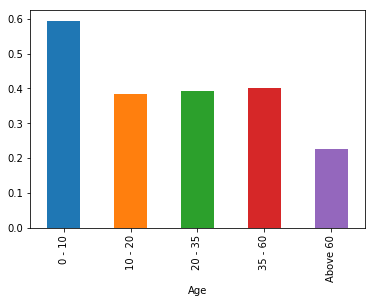

In [3]:
%pylab inline
survival_ratio_by_age(titanic_data).plot(kind='bar')

从以上图表我们可以明显的看出，年龄小于10岁的儿童的幸存率是最高的，同时年龄大于60岁的老人幸存率是最低的。

这个结果较为符合常人的直觉，孩子在遇到灾难时是被优先照顾的群体，所以很可能幸存率会比较高，而老人由于年龄造成的健康状况的下降，在这种时候很可能无法成功的存活下来。

### 性别读幸存率的影响

In [4]:
def survival_ratio_by_sex(data):
    """This function returns the survival ratio according to the sex.
    """
    survived_by_sex = data[['Survived', 'Sex']]
    return survived_by_sex.groupby('Sex')['Survived'].apply(calculate_survival_ratio)

Populating the interactive namespace from numpy and matplotlib


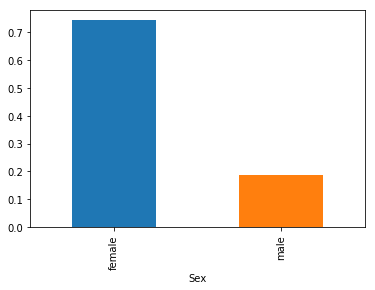

In [5]:
%pylab inline
survival_ratio_by_sex(titanic_data).plot(kind='bar')

从以上图我们可以看出，女性的幸存率要远远高于男性。我们可以认为作为弱势群体被优先照顾的女性在遇到灾难时的确会有较高的幸存率。

### 舱位等级对幸存率的影响

In [6]:
def survival_ratio_by_pclass(data):
    """This function returns the survival ratio according to the pclass.
    """
    survived_by_pclass = data[['Survived', 'Pclass']]
    return survived_by_pclass.groupby('Pclass')['Survived'].apply(calculate_survival_ratio)

Populating the interactive namespace from numpy and matplotlib


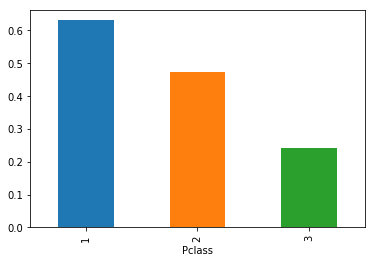

In [7]:
%pylab inline
survival_ratio_by_pclass(titanic_data).plot(kind='bar')

从以上图看出，从一等舱到三等舱可以看出一个很明显的下降趋势。我们可以认为舱位越高，幸存率越高。

### 同船的亲属或配偶数量对幸存率的影响

In [8]:
def survival_ratio_by_sibsp(data):
    """This function returns the survival ratio according to the siblings number.
    """
    survived_by_sibsp = data[['Survived', 'SibSp']]
    return survived_by_sibsp.groupby('SibSp')['Survived'].apply(calculate_survival_ratio)

Populating the interactive namespace from numpy and matplotlib


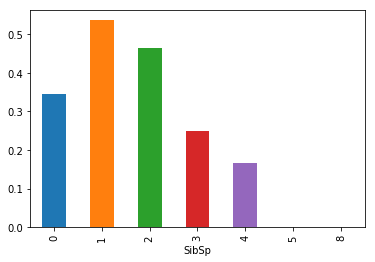

In [9]:
%pylab inline
survival_ratio_by_sibsp(titanic_data).plot(kind='bar')

从上图我们看不出有什么规律。我们可以认为同船的亲属或配偶数量对幸存率没有太多的影响。

### 同船的父母或子女数量对幸存率的影响

In [10]:
def survival_ratio_by_parch(data):
    """This function returns the survival ratio according to the parent/children number.
    """
    survived_by_parch = data[['Survived', 'Parch']]
    return survived_by_parch.groupby('Parch')['Survived'].apply(calculate_survival_ratio)

Populating the interactive namespace from numpy and matplotlib


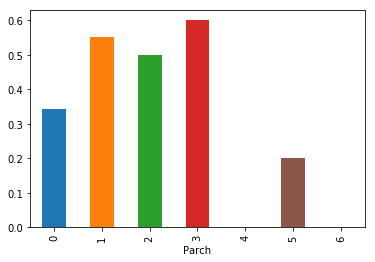

In [11]:
%pylab inline
survival_ratio_by_parch(titanic_data).plot(kind='bar')

从上图我们看不出有什么规律。我们可以认为同船的父母或子女数量对幸存率没有太多的影响。

### 结论

虽然这份泰坦尼克号的幸存者数据量有限，并且也不能代表所有类似的灾难事件，但通过以上的分析，并且结合一些人们的常识判断，我们仍然可以得出某些因素确实和幸存率之间存在一定的联系。

* 年龄小(<10)的儿童幸存率较高
* 年龄大(>60)的老人幸存率较低
* 女性的幸存率较男性高
* 舱位越高(票价越贵)幸存率越高

这些因素虽然不是决定幸存率高低的绝对原因，但仍然影响这人们在遭遇灾难时的幸存率。